In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import cast

plt.rcParams["figure.dpi"] = 256

In [108]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

## Part 1

計算整體的顧客參與人數，並以長條圖顯示。

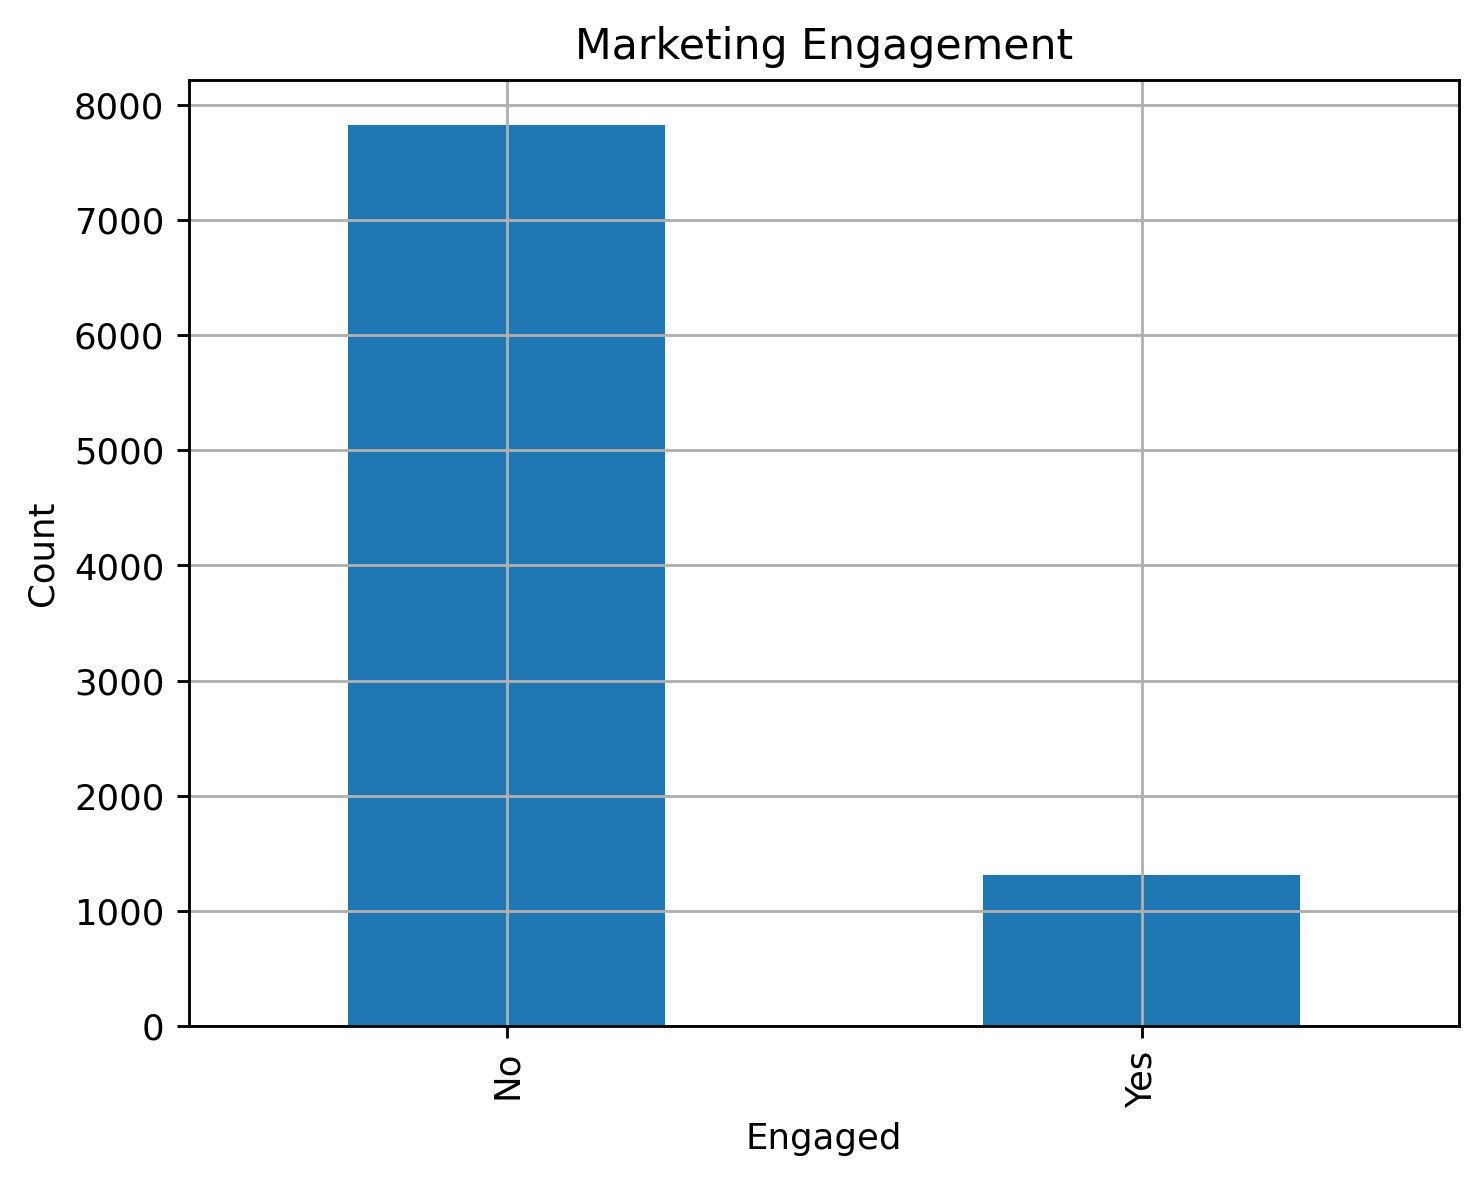

In [109]:
plt.title("Marketing Engagement")
df["Response"].value_counts().plot(kind="bar", xlabel="Engaged", ylabel="Count", grid=True)
plt.show()

## Part 2

將整體顧客參與率轉換成百分比，並以圓餅圖顯示。

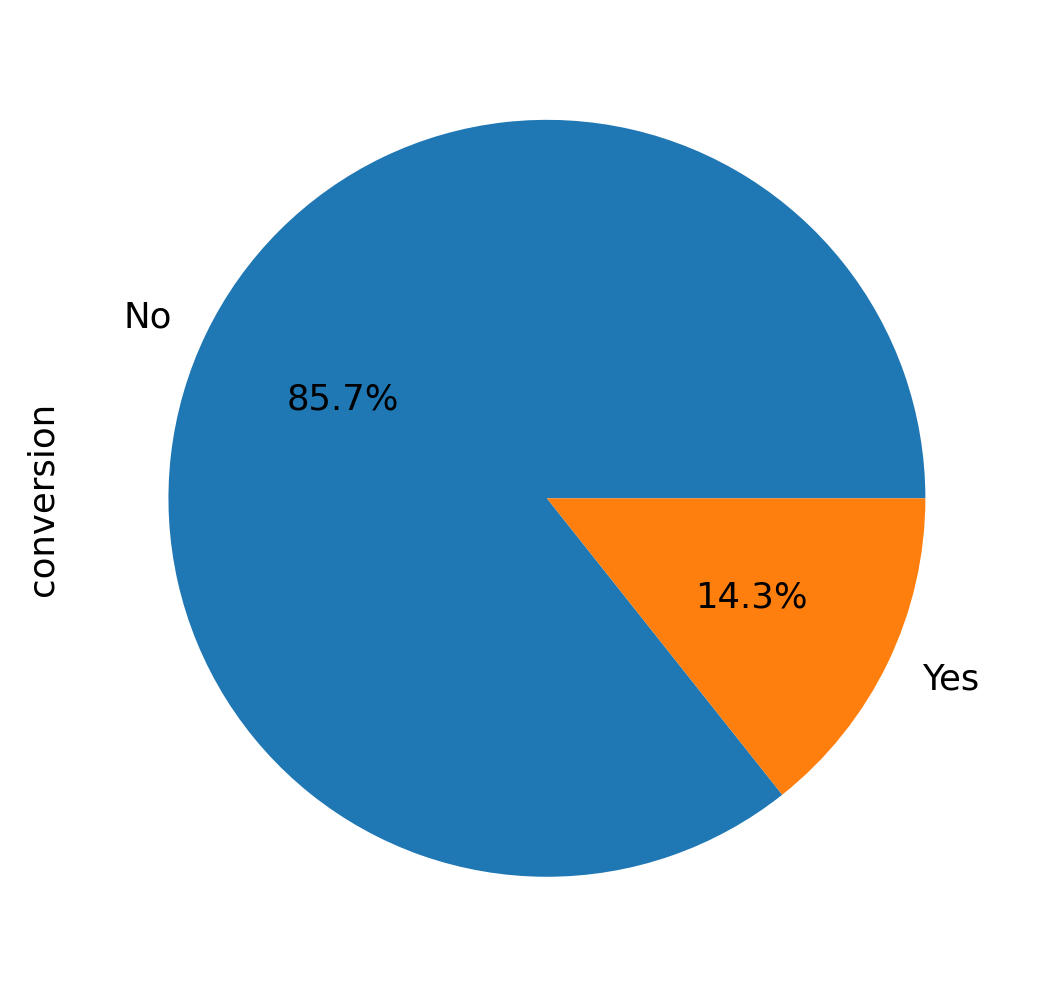

In [110]:
df["Response"].value_counts().plot(kind="pie", autopct="%1.1f%%", ylabel="conversion")
plt.show()

## Part 3

依照優惠類型，計算顧客的參與率。

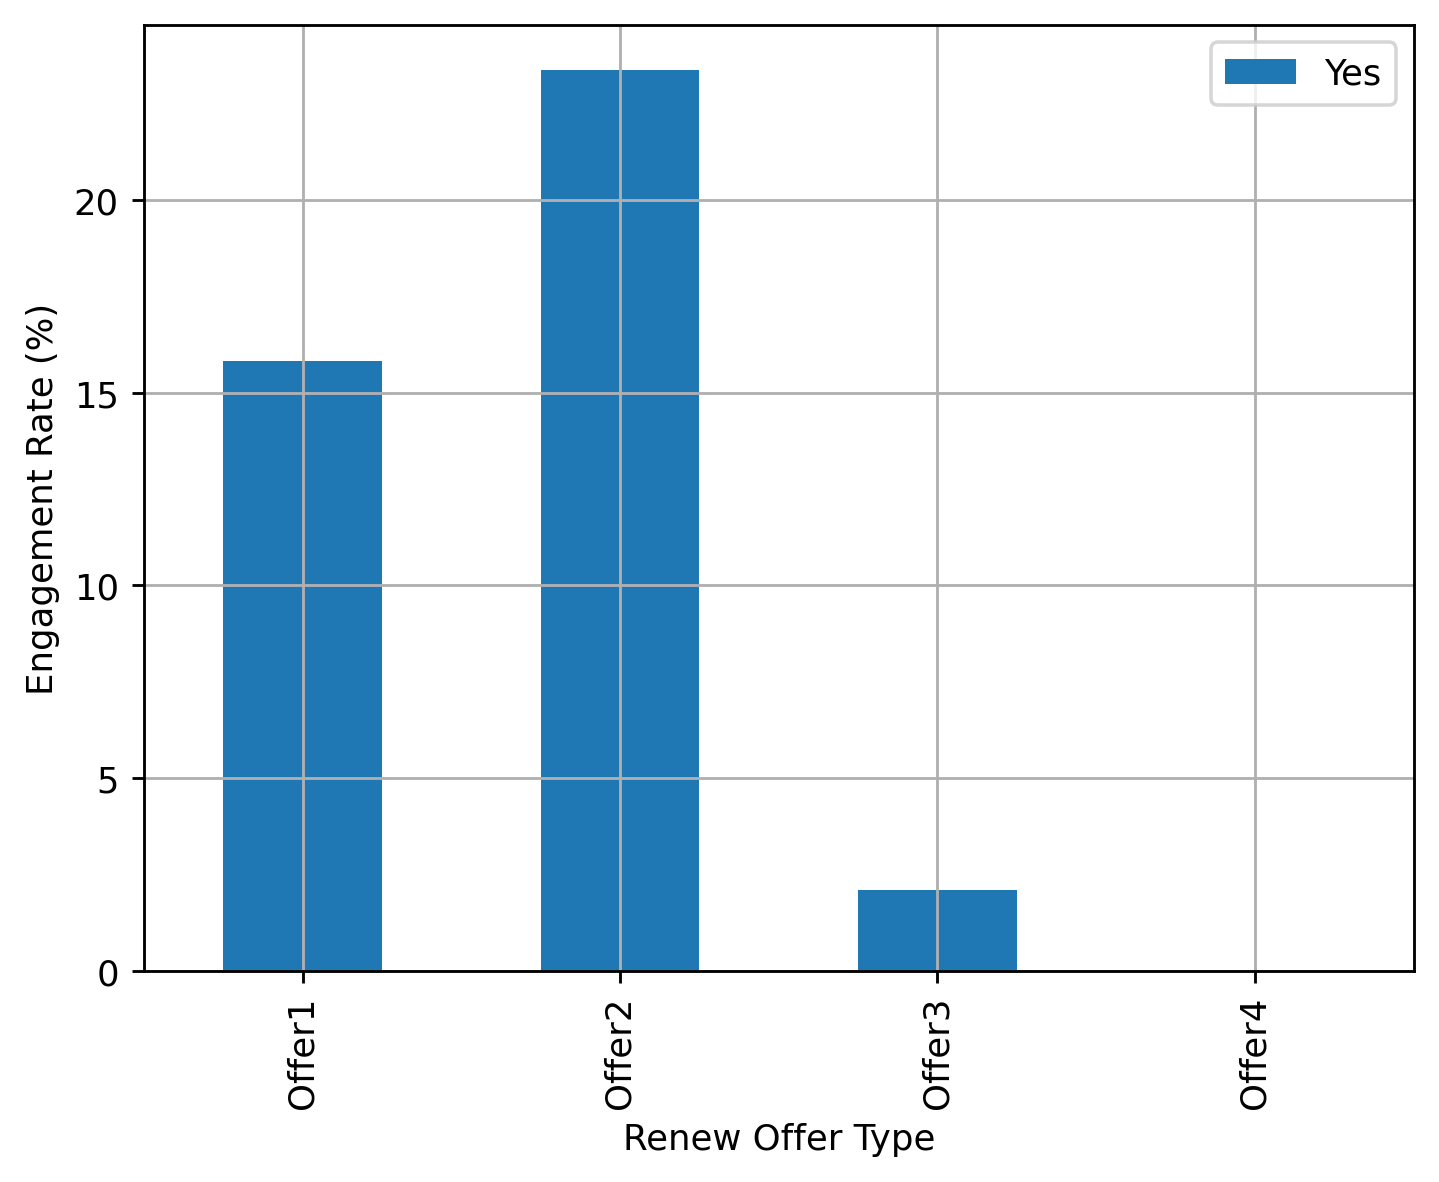

In [118]:
plt.grid()
response = pd.crosstab(df["Renew Offer Type"], df["Response"], normalize="index")["Yes"]
response.fillna(0).mul(100).plot(kind="bar", ylabel="Engagement Rate (%)", grid=True, legend=True)
plt.show()

## Part 4

計算優惠類型與車輛等級的參與率，進行樞紐分析，並將車輛等級轉換為資料欄（提示：需使用 `unstack` 函數）。

In [112]:
# way 1 (unstack)

(
    df
        .groupby(["Renew Offer Type", "Vehicle Class"])["Response"]
        .value_counts(normalize=True)
        .unstack(fill_value=0)["Yes"]
        .unstack()
)

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.146912,0.088235,0.202247,0.188341,0.185022,0.141384
Offer2,0.219178,0.146341,0.255319,0.250000,0.311688,0.241431
Offer3,0.032215,0.000000,0.000000,0.000000,0.000000,0.021053
Offer4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [113]:
# way 2 (pivot table)

pivot = df.pivot_table(
    values="Response", 
    index="Renew Offer Type", 
    columns="Vehicle Class", 
    aggfunc=lambda x: cast(pd.Series, x == "Yes").mean(), 
    fill_value=0
)
pivot

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.146912,0.088235,0.202247,0.188341,0.185022,0.141384
Offer2,0.219178,0.146341,0.255319,0.250000,0.311688,0.241431
Offer3,0.032215,0.000000,0.000000,0.000000,0.000000,0.021053
Offer4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Part 5

依照第 4. 題，將結果以長條圖顯示出來。

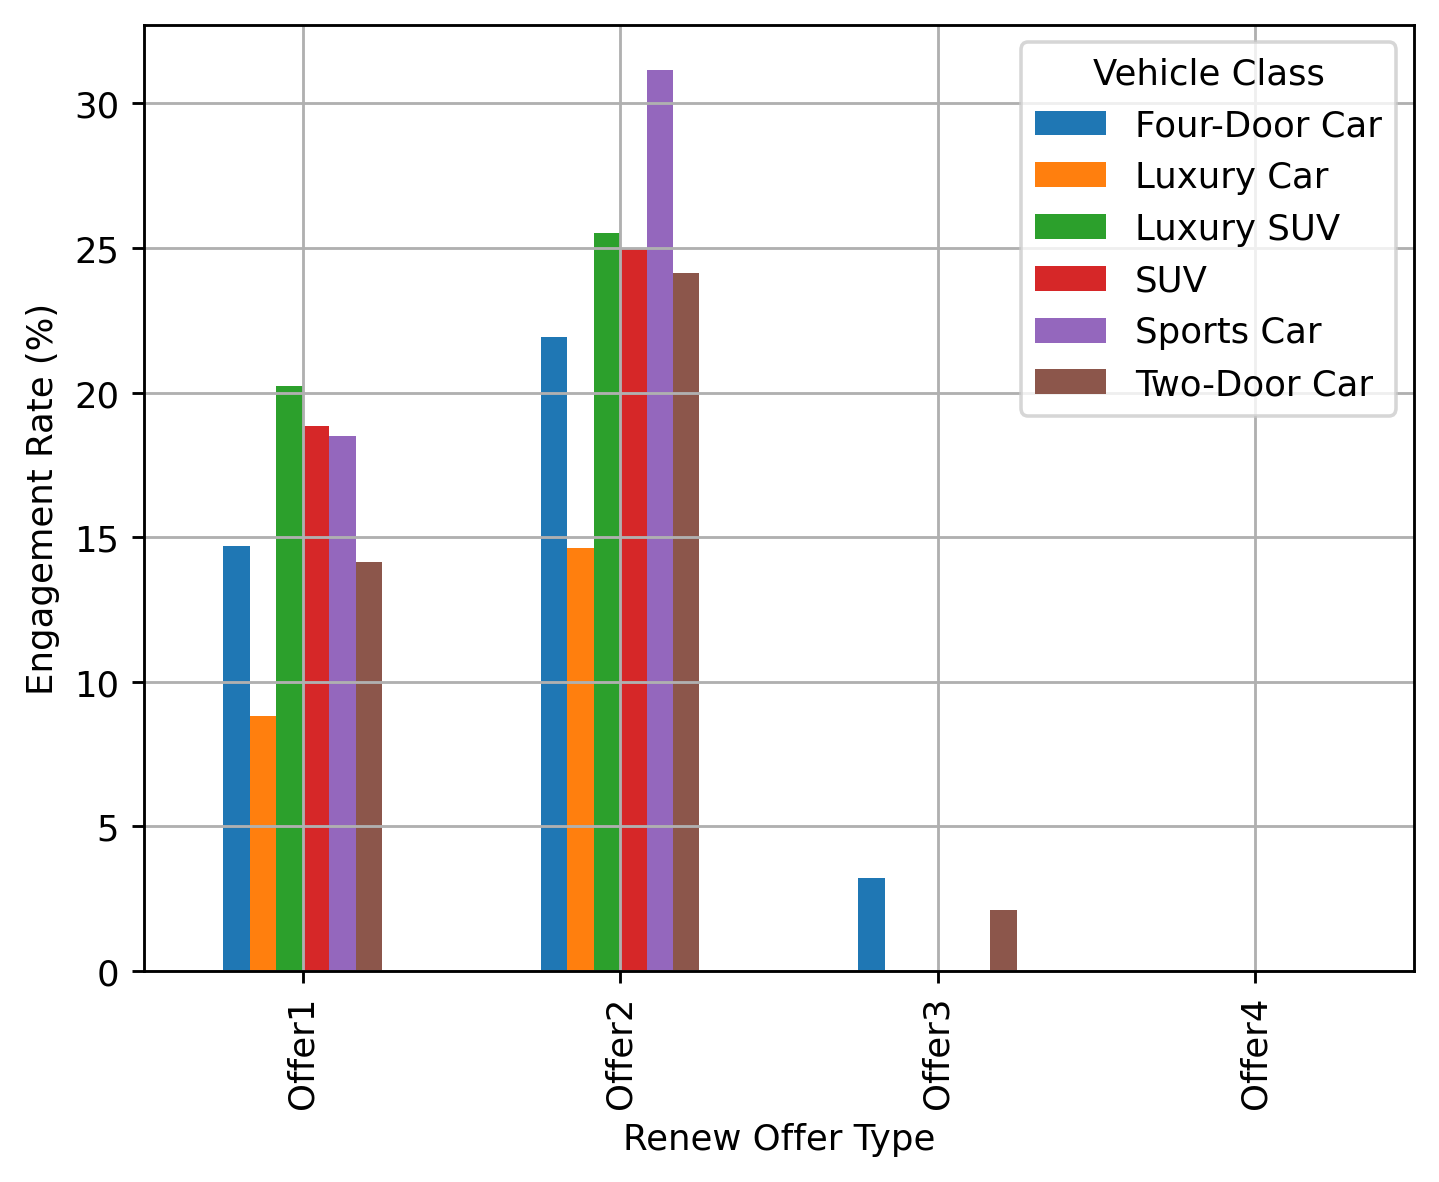

In [114]:
pivot.map(lambda v: v*100).plot(kind="bar", ylabel="Engagement Rate (%)", grid=True)
plt.show()


## Part 6

依照銷售管道，計算顧客的參與率。

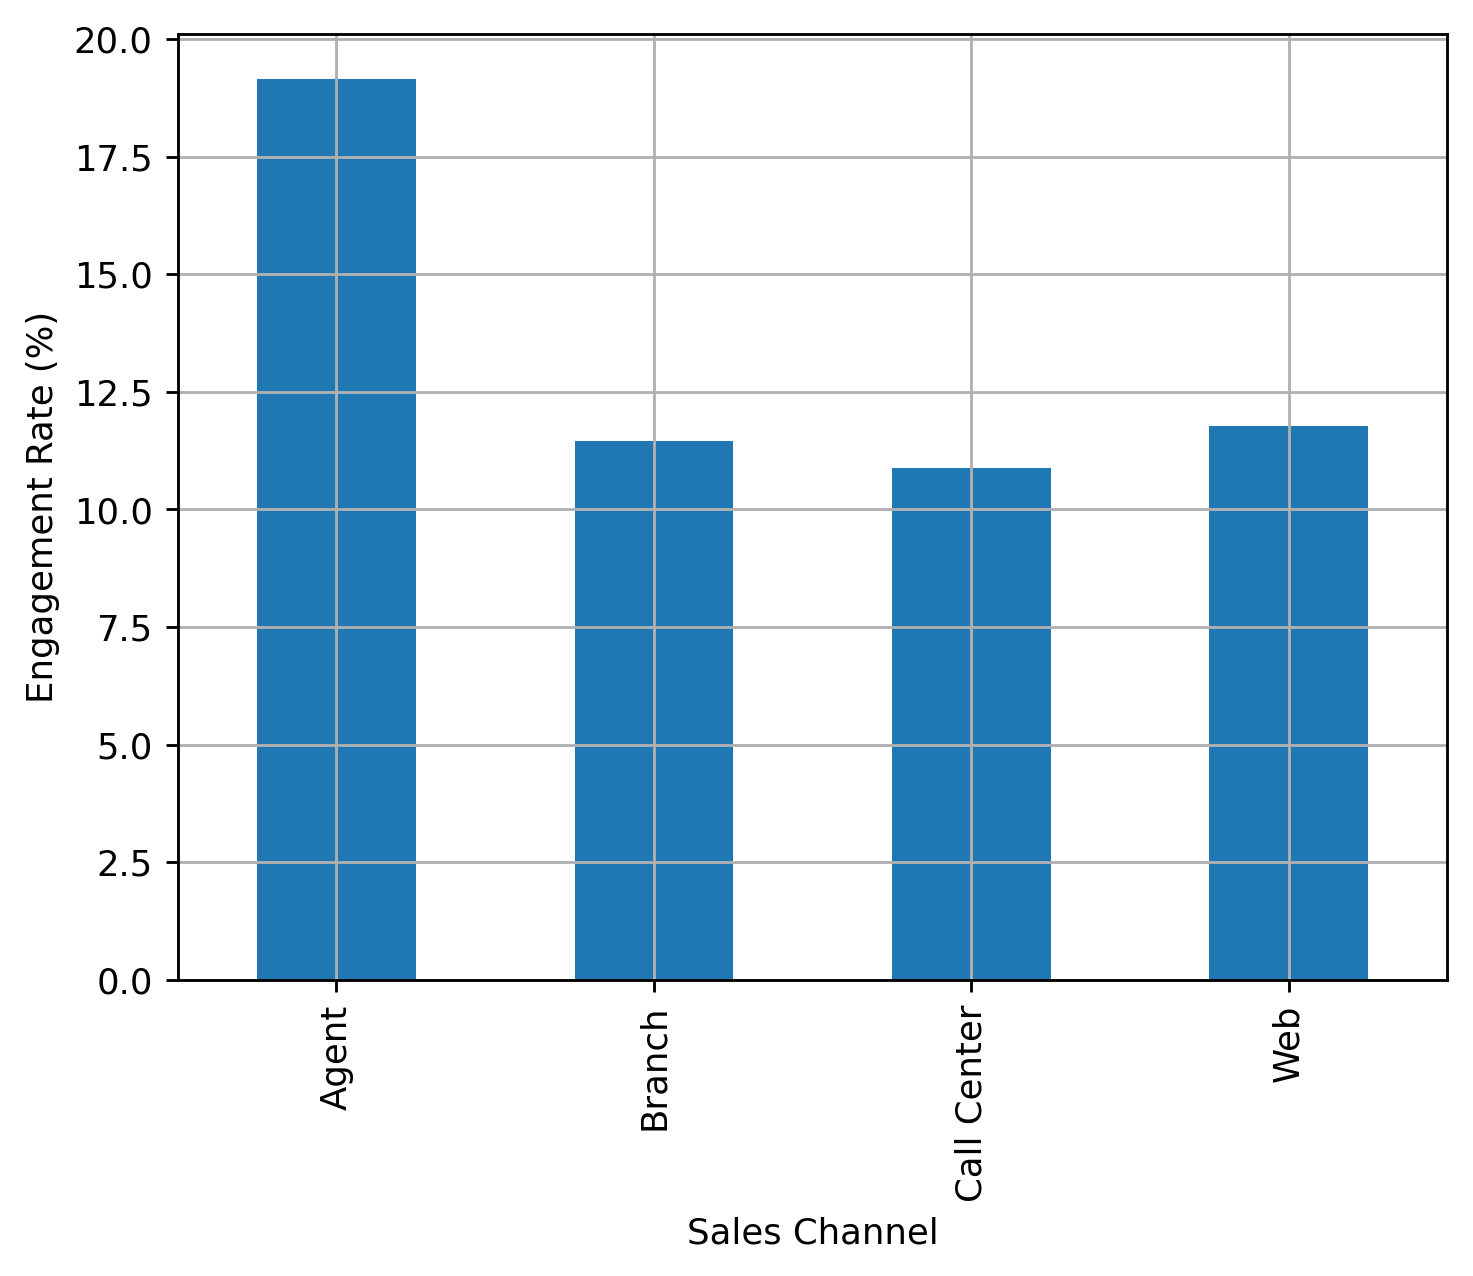

In [115]:
response = pd.crosstab(df["Sales Channel"], df["Response"], normalize="index")["Yes"]
response.map(lambda v: v*100).plot(kind="bar", ylabel="Engagement Rate (%)", grid=True)
plt.show()

## Part 7

依照銷售與車輛大小，計算顧客參與率。

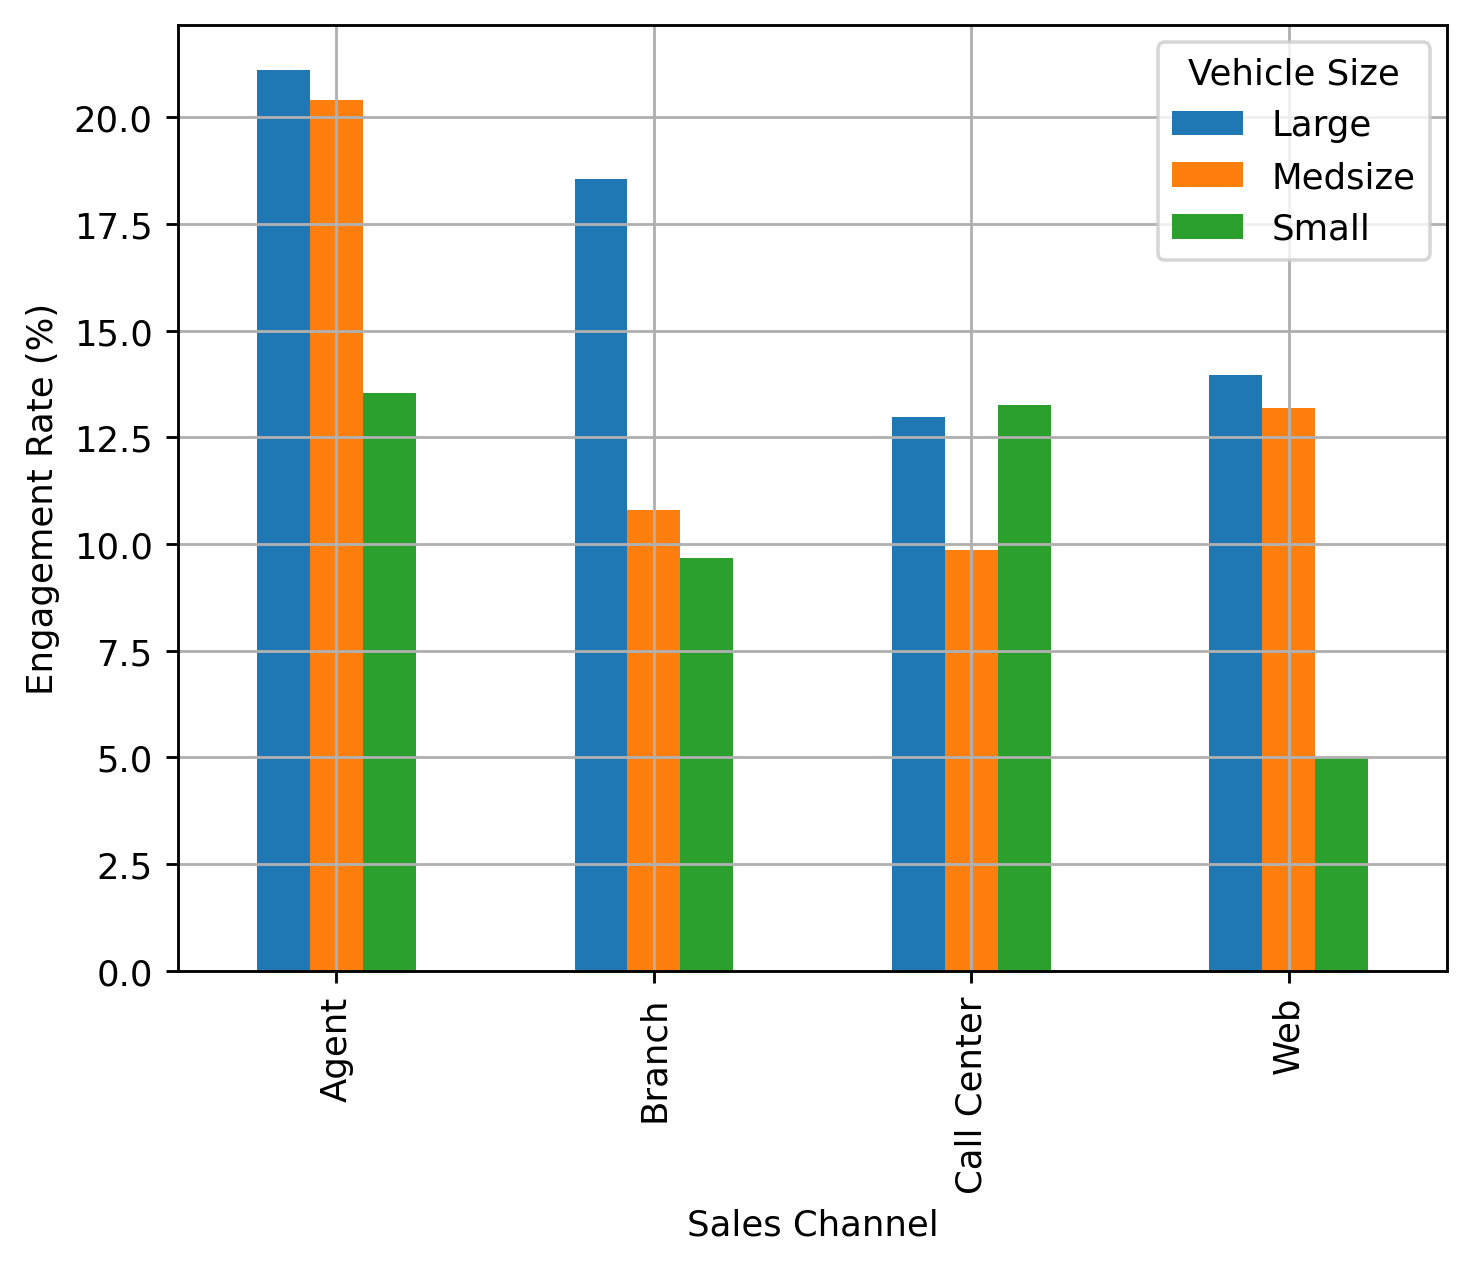

In [116]:
pivot = df.pivot_table(
    values="Response", 
    index="Sales Channel", 
    columns="Vehicle Size", 
    aggfunc=lambda x: cast(pd.Series, x == "Yes").mean(), 
    fill_value=0
)

pivot.map(lambda v: v*100).plot(kind="bar", ylabel="Engagement Rate (%)", grid=True)
plt.show()